### Import Libraries and Excel File

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\jesse\Ask a Manager Dataset\Ask-A-Manager-Salary-Survey-2021-Responses-Form-Responses.csv',
                converters={'employee_id': str.strip})

### Data Exploration

In [3]:
df.shape

(27801, 18)

In [4]:
df.columns

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

In [5]:
df.columns = ['Date', 'Age', 'Industry', 'Job_Title', 'Job_Context', 'Annual_Salary', 'Bonuses/Overtime', 'Currency',
              'Other_Currency', 'Income_Context', 'Business_Country', 'US_State', 'Business_City', 'Total_Experience',
              'Total_Domain_Experience', 'Education_Level', 'Sex', 'Race']

In [6]:
df.head()

,Date,Age,Industry,Job_Title,Job_Context,Annual_Salary,Bonuses/Overtime,Currency,Other_Currency,Income_Context,Business_Country,US_State,Business_City,Total_Experience,Total_Domain_Experience,Education_Level,Sex,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [7]:
#find the ratio of missing data in specific columns

df.isna().sum() / df.shape[0]

Date                       0.000000
Age                        0.000000
Industry                   0.002518
Job_Title                  0.000000
Job_Context                0.741304
Annual_Salary              0.000000
Bonuses/Overtime           0.258983
Currency                   0.000000
Other_Currency             0.993238
Income_Context             0.891227
Business_Country           0.000000
US_State                   0.177799
Business_City              0.002698
Total_Experience           0.000000
Total_Domain_Experience    0.000000
Education_Level            0.007554
Sex                        0.005935
Race                       0.005899
dtype: float64

In [8]:
df[df['Other_Currency'].notnull()]

,Date,Age,Industry,Job_Title,Job_Context,Annual_Salary,Bonuses/Overtime,Currency,Other_Currency,Income_Context,Business_Country,US_State,Business_City,Total_Experience,Total_Domain_Experience,Education_Level,Sex,Race
434,4/27/2021 11:09:54,25-34,Computing or Tech,Data analyst,NaN,"885,000",0.0,Other,INR,NaN,India,NaN,Pune,2 - 4 years,2 - 4 years,Master's degree,Woman,Asian or Asian American
603,4/27/2021 11:12:24,45-54,Health care,Exec admin,Located in Argentina,"1,080,000",223000.0,Other,Peso Argentino,Exchange about 1USD=165ARS,Argentina,NaN,City of Buenos Aires,11 - 20 years,11 - 20 years,College degree,Woman,"Hispanic, Latino, or Spanish origin"
752,4/27/2021 11:14:29,45-54,Public Library (technically City Govt.?),Administrative Librarian,I run a branch library and am responsible for ...,"76,302",0.0,USD,"$76,302.34",NaN,USA,Arizona,Glendale,21 - 30 years,21 - 30 years,Master's degree,Woman,White
766,4/27/2021 11:14:39,25-34,Recruitment or HR,Lead Payroll & Benefits Specialist,NaN,"64,000",6400.0,USD,My bonus is based on performance up to 10% of ...,NaN,US,New York,Schenectady,5-7 years,5-7 years,College degree,Woman,White
776,4/27/2021 11:14:45,45-54,Education (Higher Education),Sr Technical Support Rep,I,"53,000",0.0,USD,"I work for an online state university, managin...","I have excellent health benefits, time off, si...",USA,New Jersey,Trenton,8 - 10 years,2 - 4 years,Master's degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27634,1/24/2022 14:10:38,18-24,Business or Consulting,Associate Consultant,I lead and support consulting processes at a s...,680000,0.0,Other,INR,NaN,India,NaN,Bangalore,2 - 4 years,2 - 4 years,College degree,Man,Asian or Asian American
27642,1/27/2022 14:13:05,18-24,Media & Digital,homie,NaN,56,5.0,USD,5,5,us,Alabama,dino,5-7 years,1 year or less,College degree,Man,White
27729,3/26/2022 16:45:52,25-34,Computing or Tech,SWE,NaN,135000,48500.0,Other,SGD,NaN,Singapore,NaN,Singapore,8 - 10 years,5-7 years,College degree,Man,Asian or Asian American
27766,4/14/2022 7:16:45,25-34,Engineering or Manufacturing,Graduate Process Engineer,NaN,115000,18000.0,AUD/NZD,AUD,NaN,Australia,NaN,Darwin,2 - 4 years,2 - 4 years,College degree,Woman,White


In [9]:
df[df['Income_Context'].notnull()]

,Date,Age,Industry,Job_Title,Job_Context,Annual_Salary,Bonuses/Overtime,Currency,Other_Currency,Income_Context,Business_Country,US_State,Business_City,Total_Experience,Total_Domain_Experience,Education_Level,Sex,Race
9,4/27/2021 11:03:02,35-44,"Accounting, Banking & Finance",Senior Accountant,NaN,"45,000",0.0,USD,NaN,I work for a Charter School,United States,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,Woman,"Hispanic, Latino, or Spanish origin, White"
32,4/27/2021 11:03:45,25-34,"Accounting, Banking & Finance",Financial Advisor,NaN,"230,000",NaN,USD,NaN,Commission based,USA,Missouri,St. Louis,11 - 20 years,11 - 20 years,College degree,Woman,White
44,4/27/2021 11:04:04,25-34,Computing or Tech,Intelligence Analyst,NaN,"110,000",20000.0,USD,NaN,"Around 20,000 a year in stock",USA,Virginia,"Arlington, VA",8 - 10 years,8 - 10 years,Master's degree,Man,White
62,4/27/2021 11:04:29,65 or over,Property or Construction,Safety Director,NaN,"104,000",25000.0,USD,NaN,Extra money comes from overtime,USA,Georgia,Atlanta,41 years or more,21 - 30 years,College degree,Man,White
65,4/27/2021 11:04:33,25-34,Education (Higher Education),Research Programmer,Software engineering without the job title,"70,000",0.0,USD,NaN,"Technically 37.5 hours, but ends up being pret...",USA,Rhode Island,Providence,5-7 years,2 - 4 years,Master's degree,Non-binary,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27750,4/6/2022 20:25:25,25-34,Computing or Tech,Software Engineer,MLOps,340000,0.0,USD,NaN,Working two remote Jobs right now.,Usa,"Michigan, Texas, Washington",Houston,2 - 4 years,2 - 4 years,Master's degree,Man,"Asian or Asian American, Hispanic, Latino, or ..."
27772,4/21/2022 9:18:12,35-44,Publishing,Editor (redacteur medior),"Editors are classed as junior, medium and seni...",41877,NaN,EUR,NaN,Gross income pro rata. Actual income (80%) 335...,Netherlands,NaN,Amersfoort,11 - 20 years,5-7 years,Master's degree,Woman,White
27777,4/27/2022 10:34:05,45-54,Government and Public Administration,Business Librarian,NaN,57000,NaN,USD,NaN,Actually 52000 after deductions but before taxes,USA,Illinois,Chicago,11 - 20 years,11 - 20 years,Master's degree,Man,White
27794,5/11/2022 15:53:09,25-34,Nonprofits,Vice President,VP of a Small (<200 Members) Chamber of Commerce,58000,2000.0,USD,NaN,"Membership is part of my role, so my commissio...",United States,Kansas,De Soto,5-7 years,2 - 4 years,College degree,Woman,White


### Data Manipulation

In [10]:
df.drop(['Other_Currency', 'Income_Context', 'US_State', 'Job_Context'], axis=1, inplace=True)

In [11]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [12]:
df['Bonuses/Overtime'].fillna(0, inplace=True)

In [13]:
df.dtypes

Date                        object
Age                         object
Industry                    object
Job_Title                   object
Annual_Salary               object
Bonuses/Overtime           float64
Currency                    object
Business_Country            object
Business_City               object
Total_Experience            object
Total_Domain_Experience     object
Education_Level             object
Sex                         object
Race                        object
dtype: object

In [14]:
df['Annual_Salary'] = df['Annual_Salary'].str.replace(',', '')
df['Annual_Salary'] = df['Annual_Salary'].apply(pd.to_numeric)

In [15]:
df['Bonuses/Overtime'] = df['Bonuses/Overtime'].astype(int) 

In [16]:
df.head()

,Date,Age,Industry,Job_Title,Annual_Salary,Bonuses/Overtime,Currency,Business_Country,Business_City,Total_Experience,Total_Domain_Experience,Education_Level,Sex,Race
0,2021-04-27,25-34,Education (Higher Education),Research and Instruction Librarian,55000,0,USD,United States,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27,25-34,Computing or Tech,Change & Internal Communications Manager,54600,4000,GBP,United Kingdom,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,0,USD,US,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27,25-34,Nonprofits,Program Manager,62000,3000,USD,USA,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,7000,USD,US,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [17]:
#import our list of countries for later dataframe cleaning

country_list = pd.read_excel(r'C:\Users\jesse\Country-List.xlsx')
country_list.astype(str)

,Country Name,Country Code
0,Andorra,AD
1,UAE,AE
2,United Arab Emirates,AE
3,Afghanistan,AF
4,Antigua and Barbuda,AG
...,...,...
262,Yemen,YE
263,Mayotte,YT
264,South Africa,ZA
265,Zambia,ZM


In [18]:
df['Business_Country'] = df['Business_Country'].str.strip()

In [19]:
df['Business_Country'].unique()

array(['United States', 'United Kingdom', 'US', 'USA', 'Canada', 'usa',
       'UK', 'Scotland', 'U.S.', 'The Netherlands', 'Australia', 'Spain',
       'us', 'Usa', 'England', 'finland', 'United States of America',
       'France', 'United states', 'Germany', 'united states', 'Ireland',
       'India', 'Uk', 'canada', 'U.S>', 'ISA', 'Argentina',
       'Great Britain', 'United State', 'U.S.A', 'Denmark', 'U.S.A.',
       'America', 'Netherlands', 'netherlands',
       'united states of america', 'Switzerland', 'Bermuda', 'Us',
       'The United States', 'United State of America', 'Malaysia',
       'Mexico', 'United Stated', 'South Africa', 'Belgium',
       'Northern Ireland', 'u.s.', 'UNITED STATES', 'united States',
       'Sweden', 'Hong Kong', 'Kuwait', 'Norway', 'Sri lanka',
       'Contracts', 'USA-- Virgin Islands', 'United Statws', 'England/UK',
       'U.S',
       "We don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so I 

In [20]:
#map our country list to the dataframe to pick up any matching values before proceeding with cleaning

maps = dict(zip(country_list['Country Name'], country_list['Country Code']))
df['Business_Country'] = df['Business_Country'].map(maps).fillna(df['Business_Country'])

### Replace obscure country data with appropriate country code

In [21]:
df.loc[df['Business_Country'].str.contains(
    'United St|Usa|States|Statez|Sates|America|U.S.A|U.S>|U. S.|U.A.|U.SA|Us|Us Of A|U.S.|U.S.|u.s.|U.s.|U. S|🇺🇸|Unitef Stated|California|San Francisco|Virginia|ISA|I.S.', 
                                           case=False, regex=True), 'Business_Country'] = 'US'
df.loc[df['Business_Country'].str.contains(
    'Scotland|United Kingdom|Uk|Great Britain|England|England/UK|England|Britain|U.K.|United Kindom|Great Britain|U.K|Unites kingdom|Wales|Englang|Hartford'
    , 
                                           case=False, regex=True), 'Business_Country'] = 'GB'
df.loc[df['Business_Country'].str.contains(
    'canada|Canada|CANADA|Canadw|Can|Canda|Csnada|Canad', 
                                           case=False, regex=True), 'Business_Country'] = 'CA'
df.loc[df['Business_Country'].str.contains(
    'Zealand', 
                                           case=False, regex=True), 'Business_Country'] = 'NZ'
df.loc[df['Business_Country'].str.contains(
    'Netherlands|Nederland|netherlands', 
                                           case=False, regex=True), 'Business_Country'] = 'NL'
df.loc[df['Business_Country'].str.contains(
    'Ireland', 
                                           case=False, regex=True), 'Business_Country'] = 'IE'
df.loc[df['Business_Country'].str.contains(
    'czech republic|CZECH', 
                                           case=False, regex=True), 'Business_Country'] = 'CZ'
df.loc[df['Business_Country'].str.contains(
    'SWITZERLAND|switzerland', 
                                           case=False, regex=True), 'Business_Country'] = 'CH'
df.loc[df['Business_Country'].str.contains(
    'hong konh|japan', 
                                           case=False, regex=True), 'Business_Country'] = 'JP'
df.loc[df['Business_Country'].str.contains(
    'Africa|Cote d\'Ivoire', 
                                           case=False, regex=True), 'Business_Country'] = 'CF'
df.loc[df['Business_Country'].str.contains(
    'South africa', 
                                           case=False, regex=True), 'Business_Country'] = 'ZA'
df.loc[df['Business_Country'].str.contains(
    'FRANCE|france', 
                                           case=False, regex=True), 'Business_Country'] = 'FR'
df.loc[df['Business_Country'].str.contains(
    'finland', 
                                           case=False, regex=True), 'Business_Country'] = 'FI'
df.loc[df['Business_Country'].str.contains(
    'Sri lanka', 
                                           case=False, regex=True), 'Business_Country'] = 'LK'
df.loc[df['Business_Country'].str.contains(
    'Catalonia|spain', 
                                           case=False, regex=True), 'Business_Country'] = 'ES'
df.loc[df['Business_Country'].str.contains(
    'South Korea', 
                                           case=False, regex=True), 'Business_Country'] = 'KR'
df.loc[df['Business_Country'].str.contains(
    'Danmark|denmark', 
                                           case=False, regex=True), 'Business_Country'] = 'DK'
df.loc[df['Business_Country'].str.contains(
    'The Bahamas', 
                                           case=False, regex=True), 'Business_Country'] = 'BS'
df.loc[df['Business_Country'].str.contains(
    'Brasil', 
                                           case=False, regex=True), 'Business_Country'] = 'BR'
df.loc[df['Business_Country'].str.contains(
    'singapore', 
                                           case=False, regex=True), 'Business_Country'] = 'SG'
df.loc[df['Business_Country'].str.contains(
    'Luxemburg', 
                                           case=False, regex=True), 'Business_Country'] = 'LU'
df.loc[df['Business_Country'].str.contains(
    'México', 
                                           case=False, regex=True), 'Business_Country'] = 'MX'
df.loc[df['Business_Country'].str.contains(
    'croatia', 
                                           case=False, regex=True), 'Business_Country'] = 'HR'
df.loc[df['Business_Country'].str.contains(
    'INDIA', 
                                           case=False, regex=True), 'Business_Country'] = 'IN'


In [22]:
#replace non country data and drop from dataframe

df.loc[df['Business_Country'].str.contains(
    '$2,175.84|commission|brought in|remote|contracts|deducted|finance|na|Policy|Y|Global|United y|europe|UXZ', 
                                           case=False, regex=True), 'Business_Country'] = np.nan
df.dropna(axis=0, how='any', subset=['Business_Country'], inplace=True)

In [23]:
df['Business_Country'].unique()

array(['US', 'GB', 'CA', 'NL', 'AU', 'ES', 'FI', 'FR', 'DE', 'IE', 'IN',
       'AR', 'DK', 'CH', 'BM', 'MX', 'ZA', 'BE', 'SE', 'HK', 'KW', 'NO',
       'LK', 'GR', 'JP', 'AT', 'BR', 'HU', 'LU', 'CO', 'NZ', 'TT', 'CZ',
       'LV', 'PR', 'RW', 'AE', 'BD', 'RO', 'RS', 'PH', 'RU', 'PL', 'TR',
       'CN', 'AF', 'IL', 'TW', 'KH', 'SG', 'KR', 'TH', 'LT', 'ER', 'ID',
       'IS', 'IT', 'CU', 'SI', 'CF', 'SO', 'SK', 'PT', 'SL', 'BS', 'CR',
       'CL', 'QA', 'NG', 'CG', 'PK', 'UG', 'MT', 'SA', 'BG', 'EE', 'MA',
       'EC', 'ZW', 'GH', 'UA', 'HR', 'IM', 'JM', 'KE', 'JO', 'LI', 'BA'],
      dtype=object)

In [24]:
df.columns

Index(['Date', 'Age', 'Industry', 'Job_Title', 'Annual_Salary',
       'Bonuses/Overtime', 'Currency', 'Business_Country', 'Business_City',
       'Total_Experience', 'Total_Domain_Experience', 'Education_Level', 'Sex',
       'Race'],
      dtype='object')

In [25]:
df.Total_Experience.unique()

array(['5-7 years', '8 - 10 years', '2 - 4 years', '21 - 30 years',
       '11 - 20 years', '1 year or less', '41 years or more',
       '31 - 40 years'], dtype=object)

In [26]:
df.loc[df['Total_Experience'].str.contains('5-7 years',
      case=False), 'Total_Experience'] = '5 - 7 years'

In [27]:
df.Age.unique()

array(['25-34', '45-54', '35-44', '18-24', '65 or over', '55-64',
       'under 18'], dtype=object)

In [28]:
df.loc[df['Age'].str.contains('5 - 7 years',
      case=False), 'Age'] = '5-7'

In [29]:
df.Age.replace('-', ' - ', inplace=True)

In [30]:
#make the 'Age' column consistent

def insert_space(string):
    s = string.strip()
    return s.split('-')[0]+ ' - ' + s.split('-')[-1]
df['Age'].apply(lambda x: insert_space(x))

0        25 - 34
1        25 - 34
2        25 - 34
3        25 - 34
4        25 - 34
          ...   
27796    45 - 54
27797    18 - 24
27798    25 - 34
27799    25 - 34
27800    55 - 64
Name: Age, Length: 27757, dtype: object

In [31]:
df.Age.unique()

array(['25-34', '45-54', '35-44', '18-24', '65 or over', '55-64',
       'under 18'], dtype=object)

In [32]:
df.loc[df['Industry'].isnull()]

,Date,Age,Industry,Job_Title,Annual_Salary,Bonuses/Overtime,Currency,Business_Country,Business_City,Total_Experience,Total_Domain_Experience,Education_Level,Sex,Race
360,2021-04-27,45-54,NaN,Proposal Manager,87938,4000,USD,US,Wilmington,21 - 30 years,11 - 20 years,College degree,Woman,White
645,2021-04-27,35-44,NaN,Legal editor,82000,8200,USD,US,Rochester,11 - 20 years,11 - 20 years,Master's degree,Woman,White
1604,2021-04-27,25-34,NaN,Commissioning Editor,36000,0,GBP,GB,London,11 - 20 years,8 - 10 years,Master's degree,Woman,"Asian or Asian American, White"
2055,2021-04-27,35-44,NaN,Research Manager,115000,0,USD,US,DC,21 - 30 years,11 - 20 years,Master's degree,Woman,White
2063,2021-04-27,35-44,NaN,office manager,40000,0,USD,US,Las Vegas,11 - 20 years,11 - 20 years,High School,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27102,2021-10-26,25-34,NaN,Contract Administrator,41000,0,USD,US,Goleta,2 - 4 years,1 year or less,College degree,Man,White
27239,2021-10-26,25-34,NaN,Instructor/Operator,55000,0,USD,US,La Crosse,8 - 10 years,2 - 4 years,College degree,Man,White
27250,2021-10-26,55-64,NaN,Technician Automation,35000,0,EUR,IE,Donegal,31 - 40 years,31 - 40 years,Master's degree,Man,White
27592,2021-12-28,45-54,NaN,Associate professor,80000,0,USD,US,Keene,11 - 20 years,11 - 20 years,PhD,Woman,White


In [33]:
df.dropna(axis=0, how='any', subset=['Industry'], inplace=True)

In [34]:
df.Industry.isna().sum()

0

In [35]:
#drop empty rows from dataframe with empty info in 'Business_City', 'Education_Level', 'Sex', 'Race'

df.dropna(axis=0, how='any', subset=['Business_City'], inplace=True)
df.dropna(axis=0, how='any', subset=['Education_Level'], inplace=True)
df.dropna(axis=0, how='any', subset=['Sex'], inplace=True)
df.dropna(axis=0, how='any', subset=['Race'], inplace=True)

In [36]:
df.shape

(27180, 14)

In [37]:
df.isna().sum() / df.shape[0]

Date                       0.0
Age                        0.0
Industry                   0.0
Job_Title                  0.0
Annual_Salary              0.0
Bonuses/Overtime           0.0
Currency                   0.0
Business_Country           0.0
Business_City              0.0
Total_Experience           0.0
Total_Domain_Experience    0.0
Education_Level            0.0
Sex                        0.0
Race                       0.0
dtype: float64

### Data Visualisation

In [38]:
import matplotlib.pyplot as plt

In [39]:
max(df.Annual_Salary)

870000000

In [40]:
df[df.Annual_Salary == 870000000]

,Date,Age,Industry,Job_Title,Annual_Salary,Bonuses/Overtime,Currency,Business_Country,Business_City,Total_Experience,Total_Domain_Experience,Education_Level,Sex,Race
11454,2021-04-28,55-64,Education (Higher Education),Regional Operations & Training Manager,870000000,120000000,Other,ID,Jakarta,21 - 30 years,11 - 20 years,College degree,Woman,White


In [41]:
df = df[df.Annual_Salary != 870000000]

In [42]:
df.Sex.unique()

array(['Woman', 'Non-binary', 'Man', 'Other or prefer not to answer',
       'Prefer not to answer'], dtype=object)

In [43]:
df2 = df[(df.Sex != 'Other or prefer not to answer') & (df.Sex !='Prefer not to answer') & (df.Sex !='Non-binary')]

In [44]:
df2.Sex.unique()

array(['Woman', 'Man'], dtype=object)

In [45]:
d = df2.groupby(['Total_Experience', 'Sex']).agg({'Annual_Salary':['mean']})
d['Annual_Salary'] = d['Annual_Salary'].astype(int)
d

Annual_Salary
                                mean
Total_Experience Sex                
1 year or less   Man           65734
                 Woman         66923
11 - 20 years    Man          154059
                 Woman         94552
2 - 4 years      Man           85478
                 Woman         70879
21 - 30 years    Man          144066
                 Woman         97586
31 - 40 years    Man          142236
                 Woman        100166
41 years or more Man          115920
                 Woman         86497
5 - 7 years      Man          341583
                 Woman         94380
8 - 10 years     Man          223836
                 Woman         99795

In [46]:
import seaborn as sns
sex_annual_salary = df2.groupby('Sex')['Annual_Salary'].mean()

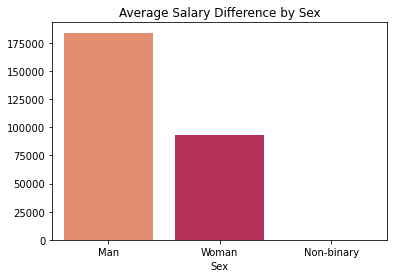

In [47]:
sns.barplot(data=df2, x=sex_annual_salary.index, y=sex_annual_salary.values, order=['Man','Woman','Non-binary'], 
            palette="rocket_r").set(title='Average Salary Difference by Sex')
plt.show()

In [48]:
x = df2.groupby(['Education_Level', 'Sex']).agg({'Annual_Salary':['mean'], 'Sex': ['count']}).reset_index()

In [49]:
x.columns = ['Education_Level', 'Gender', 'Annual_Salary', 'Gender_Count']

In [50]:
#grouped data in tabular format ready to export if need be

x['Annual_Salary'] = round(x['Annual_Salary']).astype(int)
x

,Education_Level,Gender,Annual_Salary,Gender_Count
0,College degree,Man,136350,2647
1,College degree,Woman,87237,10051
2,High School,Man,99449,242
3,High School,Woman,61867,348
4,Master's degree,Man,123840,1369
5,Master's degree,Woman,98511,7008
6,PhD,Man,825966,272
7,PhD,Woman,103240,1075
8,"Professional degree (MD, JD, etc.)",Man,174236,187
9,"Professional degree (MD, JD, etc.)",Woman,144343,1081


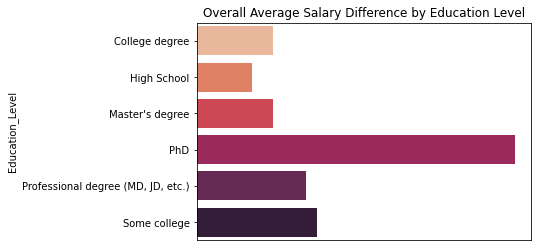

In [51]:
sns.barplot(data=x, y='Education_Level', x=x['Annual_Salary'].values.flatten(), 
            palette="rocket_r", ci=None).set(title='Overall Average Salary Difference by Education Level')
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

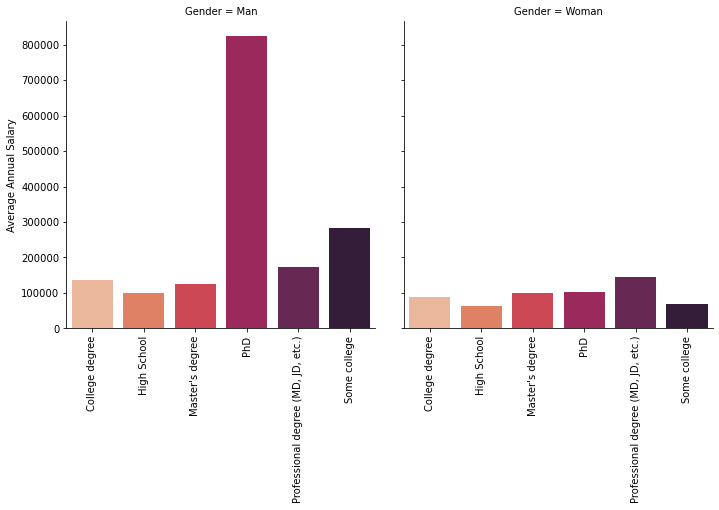

In [52]:
g = sns.catplot(data=x, x='Education_Level', y='Annual_Salary', col='Gender', kind='bar', palette="rocket_r")
g.set_xticklabels(rotation=90)
g.set_axis_labels("", "Average Annual Salary")

[Text(0.5, 1.0, 'Top 5 Highest Average Earners by Race')]

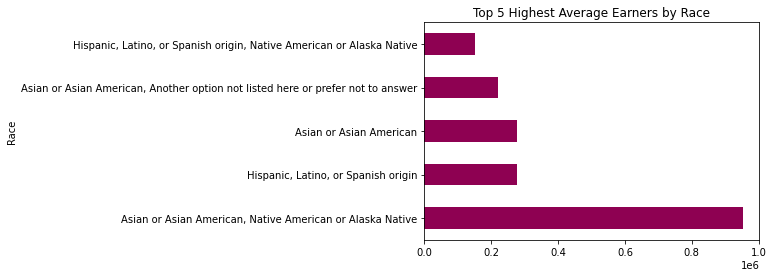

In [53]:
df.groupby('Race')['Annual_Salary'].mean().nlargest(n=5).plot(kind='barh', cmap='PiYG').set(
title='Top 5 Highest Average Earners by Race')

[Text(0.5, 1.0, 'Highest Average Earners by Age')]

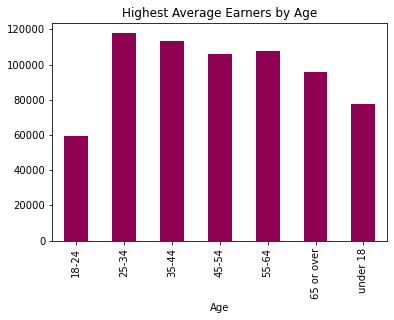

In [54]:
df.groupby('Age')['Annual_Salary'].mean().plot(kind='bar', cmap='PiYG').set(
title='Highest Average Earners by Age')